### LIBRARIES Yang Dibutuhkan

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall

from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import os


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Membuat Frame IMAGE

Pra-pemrosesan dengan ukuran 450x450, augmentasi dengan zoom range dan flip. Saya telah menguji lebih banyak solusi, seperti peningkatan kecerahan dan random crop, tetapi dengan hasil yang buruk.

In [7]:
img_size = (450, 450)

In [8]:
def data_preprocessing(path):
	datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,
	                                                          zoom_range=0.2,
																														horizontal_flip=True,
																														vertical_flip=True,
																														)

	generator = datagen.flow_from_directory(
		path,
		batch_size=25,
 		class_mode='categorical',
		target_size=img_size,
		color_mode="rgb"
    )

	return generator

In [9]:
train_dir = "/content/drive/My Drive/DeteksiPenyakit/skin-disease-classification/Split_smol/train"
val_dir = "/content/drive/My Drive/DeteksiPenyakit/skin-disease-classification/Split_smol/val"




In [10]:
train_generator = data_preprocessing(train_dir)
validation_generator = data_preprocessing(val_dir)

Found 874 images belonging to 9 classes.
Found 182 images belonging to 9 classes.



Dimensione dell'immagine: (450, 450, 3)



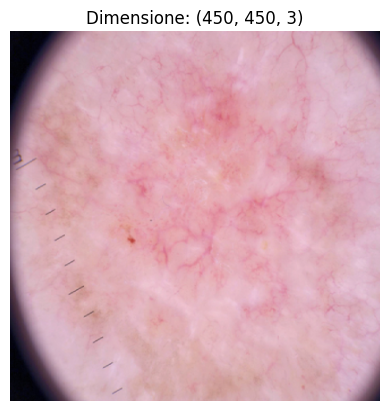

In [11]:
sample_image, _ = train_generator.next()
image_shape = sample_image.shape[1:]
num_channels = image_shape[-1]

print("\nDimensione dell'immagine:", image_shape)
print()
plt.imshow(sample_image[0])
plt.title(f"Dimensione: {image_shape}")
plt.axis('off')
plt.show()

### MODEL

Saya menggunakan LeakyReLU untuk mencegah masalah hilangnya ReLU. Ukuran kernel ditingkatkan pada lapisan menengah untuk menangkap fitur yang lebih umum. Di sisi lain, ukurannya adalah 3 untuk lapisan pertama dan terakhir, untuk memfilter detail yang lebih spesifik.

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', input_shape=(img_size[0], img_size[1], 3), kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.15),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.15),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.15),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.15),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.15),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.15),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.15),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(9, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 450, 450, 64)      1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 450, 450, 64)      0         
                                                                 
 batch_normalization (Batch  (None, 450, 450, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 225, 225, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 225, 225, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 225, 225, 128)     2

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
history_model = model.fit(train_generator, epochs = 95, validation_data = validation_generator)

Epoch 1/95
35/35 [==============================] - 744s 20s/step - loss: 2.4180 - accuracy: 0.3124 - precision: 0.3487 - recall: 0.1819 - val_loss: 13.3797 - val_accuracy: 0.1602 - val_precision: 0.1629 - val_recall: 0.1602
Epoch 2/95
35/35 [==============================] - 74s 2s/step - loss: 1.9981 - accuracy: 0.3455 - precision: 0.4274 - recall: 0.2357 - val_loss: 3.0552 - val_accuracy: 0.1271 - val_precision: 0.1382 - val_recall: 0.0939
Epoch 3/95
35/35 [==============================] - 76s 2s/step - loss: 1.8644 - accuracy: 0.3593 - precision: 0.4249 - recall: 0.2300 - val_loss: 2.8261 - val_accuracy: 0.1381 - val_precision: 0.4167 - val_recall: 0.0276
Epoch 4/95
35/35 [==============================] - 74s 2s/step - loss: 1.7621 - accuracy: 0.3913 - precision: 0.4715 - recall: 0.2746 - val_loss: 2.4322 - val_accuracy: 0.2044 - val_precision: 0.4444 - val_recall: 0.0663
Epoch 5/95
35/35 [==============================] - 74s 2s/step - loss: 1.7004 - accuracy: 0.3833 - precision

In [13]:
model.save('/content/drive/My Drive/DeteksiPenyakit/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The training over the 30th epoch just overfitted the model, so it was discarded. A 63% validation accuracy is not much, but it's hard to pretend more with less than 700 pictures and 9 classes.

### TEST

In [14]:
model = tf.keras.models.load_model('/content/drive/My Drive/DeteksiPenyakit/model.h5')

# Daftar nama kelas
class_names = list(train_generator.class_indices.keys())

# Ukuran gambar yang digunakan untuk pelatihan
img_size = (450, 450)

def predict_disease(model, img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(img_size[0], img_size[1]), color_mode='rgb')
    array = tf.keras.utils.img_to_array(img)
    array = array / 255.0

    img_array = np.expand_dims(array, axis=0)
    preds = model.predict(img_array)

    formatted_predictions = [f'{value:.2f}' for value in preds[0]]

    top_prob_index = np.argmax(preds[0])
    top_prob = round(float(formatted_predictions[top_prob_index]) * 100, 2)

    print("Probability for each class:", sorted(zip(class_names, formatted_predictions), key=lambda x: x[1], reverse=True))

    plt.imshow(tf.keras.utils.load_img(img_path, target_size=(img_size[0], img_size[1]), color_mode='rgb'))
    plt.axis('off')
    plt.title(f"Class: {class_names[top_prob_index]}; Prob: {top_prob}%")
    plt.show()

1/1 [==============================] - 0s 20ms/step
Probability for each class: [('Vascular lesion', '0.22'), ('Dermatofibroma', '0.17'), ('Atopic Dermatitis', '0.16'), ('Actinic keratosis', '0.12'), ('Tinea Ringworm Candidiasis', '0.11'), ('Melanocytic nevus', '0.08'), ('Melanoma', '0.07'), ('Squamous cell carcinoma', '0.05'), ('Benign keratosis', '0.02')]


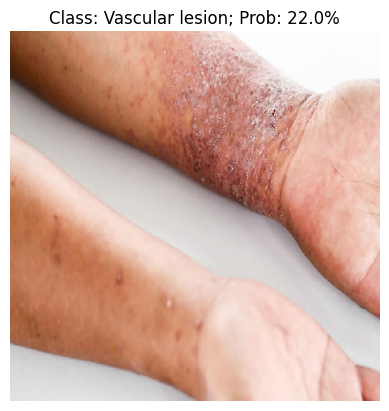

In [16]:
predict_disease(model, "/content/drive/My Drive/DeteksiPenyakit/skin-disease-classification/Split_smol/val/atopic-dermatitis.jpg")

1/1 [==============================] - 0s 49ms/step
Probability for each class: [('Atopic Dermatitis', '0.99'), ('Melanoma', '0.01'), ('Actinic keratosis', '0.00'), ('Benign keratosis', '0.00'), ('Dermatofibroma', '0.00'), ('Melanocytic nevus', '0.00'), ('Squamous cell carcinoma', '0.00'), ('Tinea Ringworm Candidiasis', '0.00'), ('Vascular lesion', '0.00')]


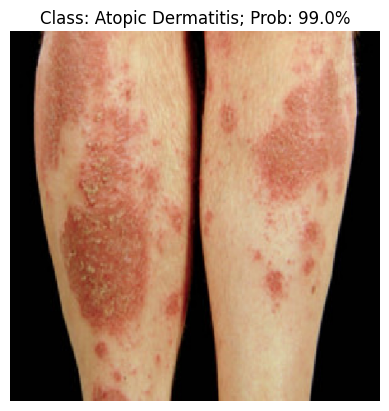

In [ ]:
predict_disease(model, "/content/drive/My Drive/DeteksiPenyakit/skin-disease-classification/Split_smol/val/Atopic Dermatitis/1_20.jpg")

1/1 [==============================] - 0s 39ms/step
Probability for each class: [('Benign keratosis', '0.62'), ('Tinea Ringworm Candidiasis', '0.13'), ('Dermatofibroma', '0.06'), ('Actinic keratosis', '0.05'), ('Melanoma', '0.04'), ('Squamous cell carcinoma', '0.03'), ('Vascular lesion', '0.03'), ('Atopic Dermatitis', '0.02'), ('Melanocytic nevus', '0.02')]


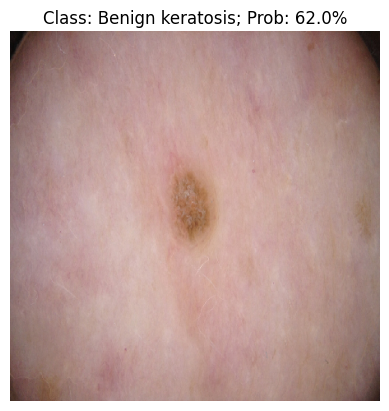

In [ ]:
predict_disease(model, "/content/drive/My Drive/DeteksiPenyakit/skin-disease-classification/Split_smol/val/Benign keratosis/ISIC_0014633_downsampled.jpg")

1/1 [==============================] - 0s 35ms/step
Probability for each class: [('Melanoma', '0.42'), ('Atopic Dermatitis', '0.20'), ('Melanocytic nevus', '0.17'), ('Dermatofibroma', '0.11'), ('Squamous cell carcinoma', '0.07'), ('Vascular lesion', '0.02'), ('Actinic keratosis', '0.01'), ('Benign keratosis', '0.01'), ('Tinea Ringworm Candidiasis', '0.00')]


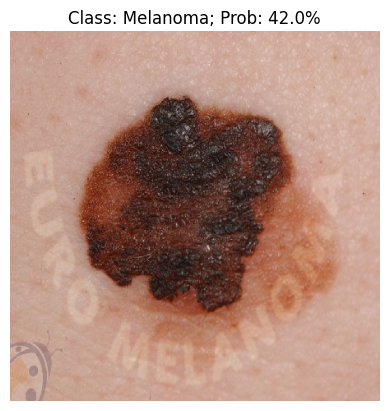

In [ ]:
predict_disease(model, "/content/drive/My Drive/DeteksiPenyakit/skin-disease-classification/Split_smol/val/mel1.jpg")